In [1]:

import pandas as pd
import numpy as np
import os
import re 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from nltk.corpus import stopwords
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from textblob import Word
ndat=[] 
test_list=[]

In [15]:
with open("D:\\Python project\\flipcart query\\training.txt","r") as f:
    for p in f:
        ndat.append(p.strip())  
with open("D:\\Python project\\flipcart query\\sampleInput.txt","r") as myinpt:
    for q in myinpt:
        test_list.append(q.strip())

ndat.pop(0)
test_list.pop(0)

New_Labels=["alldata"]
ndf = pd.DataFrame(ndat)
samp_ipdf = pd.DataFrame(test_list)
ndf.columns=New_Labels
samp_ipdf.columns=New_Labels

In [16]:
ndf.head(5)

,alldata
0,For The Love of Physics (Paperback)\tphysics
1,Nike Fission Deodorant Spray - 200 ml (For M...
2,Spoken English (With CD) 2nd Edition (Paperbac...
3,The C++ Programming Language 3 Edition (Paperb...
4,Sony Cybershot DSC-W610 Point & Shoot (Black)\...


In [17]:
ndf['alldata']=ndf['alldata'].str.replace("\t","_")     
    
ndf[['Desription','Product_name']] = ndf.alldata.str.split("_",expand=True,)

ndf['Product_name'].value_counts()

c = ndf['Product_name'].astype('category')
#encoding
ndf['targetX'] = c.cat.codes


In [18]:
samp_ipdf.head(5)

,alldata
0,"God Moments: Stories That Inspire, Moments to ..."
1,"The Ultimate C: Concepts, Programs and Intervi..."
2,"Canon EOS 1100D SLR (Black, with Kit (EF S18-5..."
3,A Textbook of Organic Chemistry for JEE Main &...
4,Test your C ++ Skills 1 Edition (Paperback)


In [19]:
d = dict(enumerate(c.cat.categories))
ndf['level_back'] = ndf['targetX'].map(d)

stop = stopwords.words('english')

In [20]:

ndf['Desription'] = ndf['Desription'].str.replace(r"[^a-zA-Z]+", ' ')
ndf['Desription']= ndf['Desription'].str.lower()
ndf['Desription']= ndf['Desription'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))


In [21]:
samp_ipdf['Desription']=samp_ipdf['alldata']
samp_ipdf['Desription'] = samp_ipdf['Desription'].str.replace(r"[^a-zA-Z]+", ' ')
samp_ipdf['Desription']= samp_ipdf['Desription'].str.lower()
samp_ipdf['Desription']= samp_ipdf['Desription'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))


In [22]:
tf_vect = TfidfVectorizer(norm='l2', use_idf=True, smooth_idf=True, sublinear_tf=False)
x_train_tf = tf_vect.fit_transform(ndf['Desription'])
x_test_tf = tf_vect.transform(samp_ipdf['Desription'])

algo=LinearSVC()

In [23]:
X_train, X_test, y_train, y_test = train_test_split(x_train_tf,ndf['targetX'], test_size=0.25)
model_lsvc = algo.fit(X_train, y_train)


In [25]:
ytest = np.array(y_test)
print(classification_report(ytest, model_lsvc.predict(X_test)))

             precision    recall  f1-score   support

          1       1.00      1.00      1.00         3
          2       1.00      1.00      1.00         2
          3       1.00      1.00      1.00         2
          4       1.00      1.00      1.00         1
          5       1.00      0.80      0.89         5
          6       1.00      0.50      0.67         4
          8       1.00      1.00      1.00         2
          9       0.67      1.00      0.80         2
         10       1.00      1.00      1.00         4
         11       1.00      1.00      1.00         3
         12       1.00      1.00      1.00         4
         13       0.60      1.00      0.75         3
         14       1.00      1.00      1.00         5
         15       1.00      1.00      1.00         2
         16       1.00      1.00      1.00         2
         17       1.00      1.00      1.00         3
         18       1.00      1.00      1.00         3
         19       1.00      1.00      1.00   

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, model_lsvc.predict(X_test))

0.9464285714285714

In [27]:
algo.fit(x_train_tf,ndf['targetX'])
samp_ipdf['Predicted']=algo.predict(x_test_tf)

samp_ipdf['output'] = samp_ipdf['Predicted'].map(d)

samp_ipdf['output'].value_counts()

np.savetxt(r'D:\\Python project\\flipcart query\\output.txt', samp_ipdf['output'], fmt='%s')


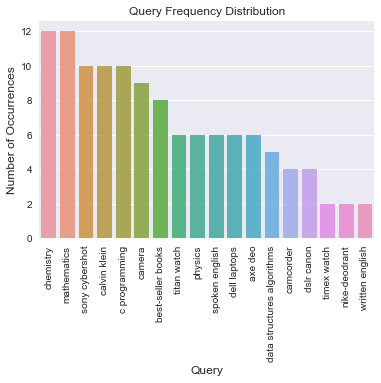

In [35]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
query_count = samp_ipdf['output'].value_counts()
sns.set(style="darkgrid")
sns.barplot(query_count.index, query_count.values, alpha=0.9)
plt.title('Query Frequency Distribution')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xticks(rotation='vertical')
plt.xlabel('Query', fontsize=12)
plt.show()